<a href="https://colab.research.google.com/github/aezamor3/MAT421/blob/main/MAT_421_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*****My Notes on Linear Interpolation***

Linear interpolation estimates a point by assuming it lies on the line joining the nearest points to the left and right. We assume that the x-data points are in ascending order and apply the formula

𝑦̂ (𝑥)=𝑦𝑖+(𝑦𝑖+1−𝑦𝑖)(𝑥−𝑥𝑖)(𝑥𝑖+1−𝑥𝑖)

(Although this problem also applies cubic spine interpolation, I will list my notes near the next problem as it focuses solely on cubic spine interpolation.)


Write a function my_interp_plotter(x, y, X, option), where x and y are arrays containing experimental data points, and X is an array containing the coordinates for which an interpolation is desired. The input argument option should be a string, either ‘linear’, ‘spline’, or ‘nearest’. Your function should produce a plot of the data points (𝑥,𝑦) marked as red circles. and the points (𝑋,𝑌), where X is the input and Y is the interpolation at the points contained in X defined by the input argument specified by option. The points (𝑋,𝑌) should be connected by a blue line. Be sure to include title, axis labels, and a legend. Hint: You should use interp1d from scipy, and checkout the kind option.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
def my_interp_plotter(x,y,X,option):
  plt.figure(figsize = (10, 8))
  plt.plot(x, y, 'ro', label="data")
  f=interpolate.interp1d(x,y,option)
  Y=f(X)
  plt.plot(X,Y,"b",label=option)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  if option=="linear":
    plt.title("linear interpolation of data")
  elif option=="cubic":
    plt.title("cubic spline interpolation of data")
  elif option=="nearest": 
    plt.title("nearest interpolation of data")
  plt.show()

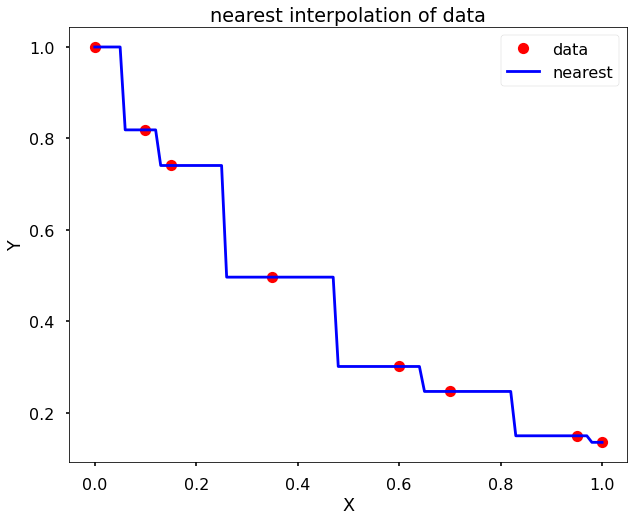

In [75]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

my_interp_plotter(x, y, np.linspace(0, 1, 101), 'nearest')

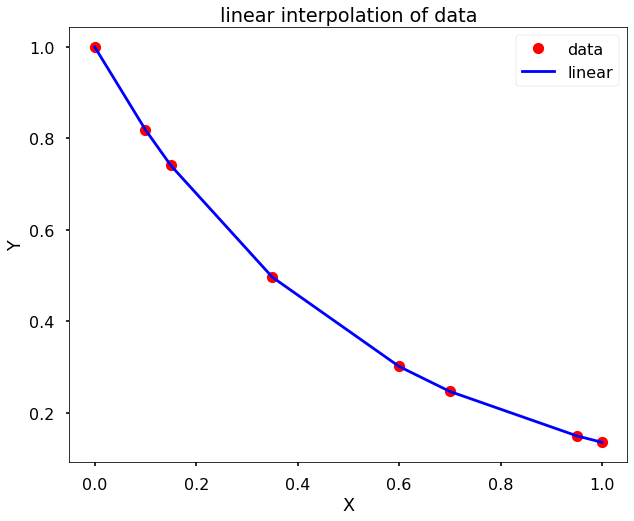

In [76]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'linear')


test code says 'cubic', but question says 'spline', so I have edited the program to take the command 'cubic' rather than 'spline' for the option, as that is what the code says, but also 'spline' is not supported by the package.

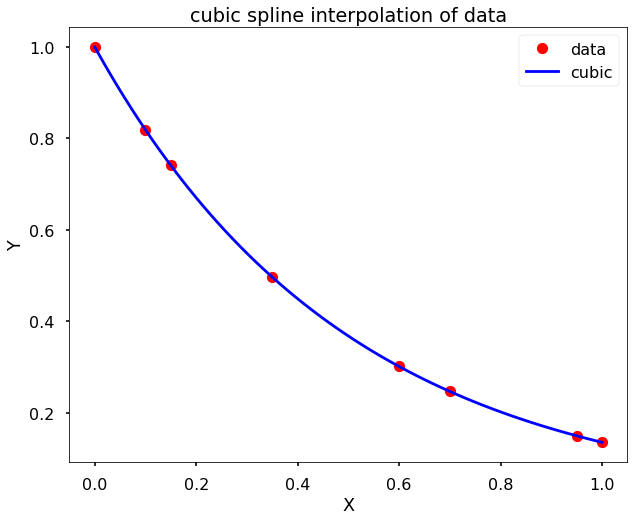

In [77]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'cubic')

*****My Notes on Linear Interpolation***

This method utilizes a set of piecewise cubic functions as the interpolating function.
We assum points (𝑥𝑖,𝑦𝑖) and (𝑥𝑖+1,𝑦𝑖+1) are joined by a cubic polynomial 𝑆𝑖(𝑥)=𝑎𝑖𝑥3+𝑏𝑖𝑥2+𝑐𝑖𝑥+𝑑𝑖 .
For N points there are n-1 points to find.
Each cubic function reqeuires 4 coefficients.
There are a total of 4(n-1) unknowns, thus there are 4(n-1) independent equations to find all coefficients.
Cubic functions must intersect, knowing this we can comput 2(n-1) equations.
We then constrain the splines to have continuous first and second derivatives at the data points i=s,...,n-1. Giving us 2(n-2) equations.
We still are left with 2 more equations that we will need to finds, so we make the last 2 functions binary, and choose them in a way to fit the circumstances of our model. 
A very common set of final constraints is to simply assume that the second derivates are 0 at each end point, meaning the curve is a straint line at the end points.


Write a function my_D_cubic_spline(x, y, X, D), where the output Y is the cubic spline interpolation at X taken from the data points contained in x and y. However, instead of the standard pinned endpoint conditions (i.e., 𝑆″1(𝑥1)=0 and 𝑆″𝑛−1(𝑥𝑛)=0) you should use the endpoint conditions 𝑆′1(𝑥1)=𝐷 and 𝑆′𝑛−1(𝑥𝑛)=𝐷 (i.e., the slopes of the interpolating polynomials at the endpoints is 𝐷).

In [78]:
from scipy.interpolate import CubicSpline
def my_D_cubic_spline(x,y,X,D):
  f=CubicSpline(x,y,bc_type=((1,D),(1,D)))
  Y=f(X)
  plt.plot(X,Y,"b",label="clamped")
  plt.scatter(x,y)
  plt.plot(1.5,f(1.5), 'ro', ms=25)
  return Y

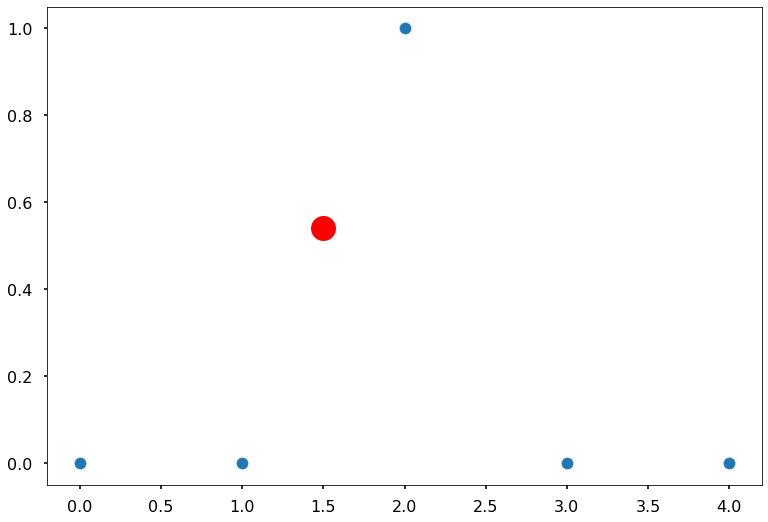

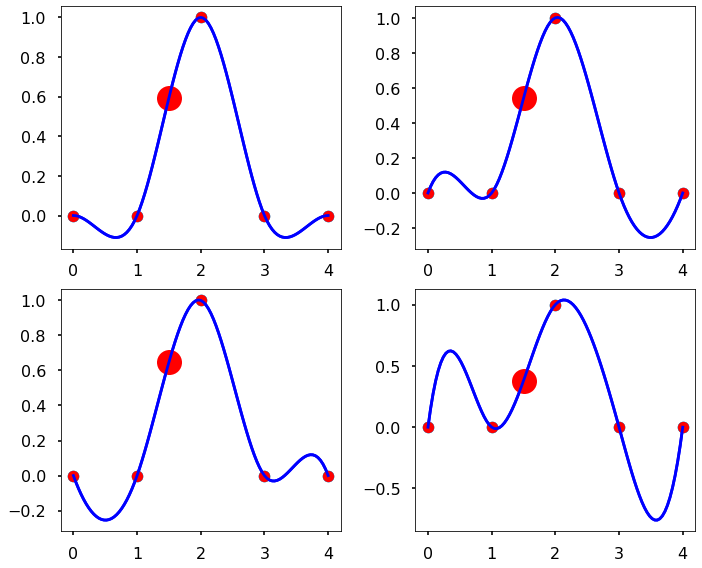

In [79]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)

# Solution: Y = 0.54017857
Y = my_D_cubic_spline(x, y, 1.5, 1)

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 0), 'b')
plt.subplot(222)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 1), 'b')
plt.subplot(223)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, -1), 'b')
plt.subplot(224)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 4), 'b')
plt.tight_layout()
plt.show()